In [1]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
import pprint

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action, NodeActionData, NodeActionDataUpdate
from syft.service.action.action_graph import ActionStatus
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph import NetworkXBackingStore

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.9


### Initialize the action graph service with verify key

In [2]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [3]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

### Create some dummy data

In [4]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])

### Create the action graph

```
action1 -> a + b = c

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48
```

#### action1 -> a + b = c

In [5]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 1c4ab86074614b7e83c409657101ab5b
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 9ce83d77adfc100f7e37c5107959d82b5439ec239939e248cdf9573a901befe4
  is_mutated: str = False

```

#### action2 -> initialization of variable `d`

In [6]:
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = 9a20cfaabe044de1a6953715125b1005
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 9ce83d77adfc100f7e37c5107959d82b5439ec239939e248cdf9573a901befe4
  is_mutated: str = False

```

In [7]:
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()

In [8]:
node_action_data_2

```python
class NodeActionData:
  id: str = 9a20cfaabe044de1a6953715125b1005
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 9ce83d77adfc100f7e37c5107959d82b5439ec239939e248cdf9573a901befe4
  is_mutated: str = False

```

#### action3 -> c * d

In [9]:
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = d804998df38141ebbacc2077c412a665
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 9ce83d77adfc100f7e37c5107959d82b5439ec239939e248cdf9573a901befe4
  is_mutated: str = False

```

#### action4 -> d.astype('int32')

In [10]:
as_type_action_obj = ActionObject.from_obj('np.int32')
as_type_action_obj

'np.int32'

In [11]:
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,  # pay attention here
    args=[as_type_action_obj.syft_lineage_id],  # pay attention here
    kwargs={},
    result_id=action2.result_id  # pay attention here
)
action4

```python
class Action:
  id: str = 0db8bfb5210a4c179f50820177854d63
  path: str = "action.execute"
  op: str = "astype"
  remote_self: str = 8764b2e19c9545d1bd3889a462a4fa80
  args: str = [<LineageID: 194f4bfebc9b446ea3305f6a67fee617 - 984809888860932498>]
  kwargs: str = {}
  result_id: str = 8764b2e19c9545d1bd3889a462a4fa80

```

In [12]:
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 0db8bfb5210a4c179f50820177854d63
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 9ce83d77adfc100f7e37c5107959d82b5439ec239939e248cdf9573a901befe4
  is_mutated: str = False

```

In [13]:
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()
node_action_data_2.is_mutated == True

True

#### action5 -> d + 48

In [14]:
arg_action_obj = ActionObject.from_obj(48)
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action4.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
action_graph_service.add_action(context=authed_context, action=action5)

```python
class NodeActionData:
  id: str = 56fc19b9219b4a1090f4bf59572f68a1
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 9ce83d77adfc100f7e37c5107959d82b5439ec239939e248cdf9573a901befe4
  is_mutated: str = False

```

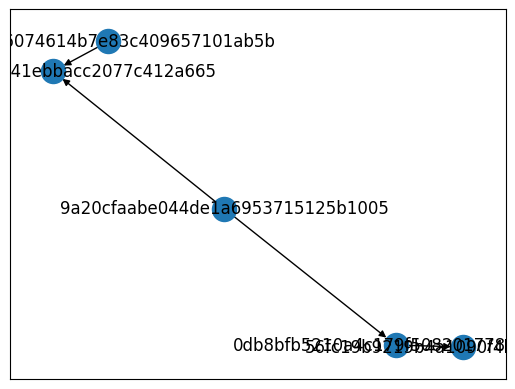

In [15]:
action_graph_service.store.graph.visualize()

In [16]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")
print(f"{action5.id = }")

action1.id = <UID: 1c4ab86074614b7e83c409657101ab5b>
action2.id = <UID: 9a20cfaabe044de1a6953715125b1005>
action3.id = <UID: d804998df38141ebbacc2077c412a665>
action4.id = <UID: 0db8bfb5210a4c179f50820177854d63>
action5.id = <UID: 56fc19b9219b4a1090f4bf59572f68a1>


## Mutation

In [17]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [18]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

#### action1 -> initialization of variable `a`

In [19]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 19f23bb2267f4957bc9125d17a63293d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 6dd7acf244f7ccaafa1f2aff7aaa06e7126c56df73b1b1fe54a7e3872c67a4b8
  is_mutated: str = False

```

#### action2 -> a.astype('int32') = b: mutation

In [20]:
as_type_action_obj = ActionObject.from_obj('np.int32')
action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id  # pay attention here
)
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = 42b3ab30edc04fa786a1ca75de147d63
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 6dd7acf244f7ccaafa1f2aff7aaa06e7126c56df73b1b1fe54a7e3872c67a4b8
  is_mutated: str = False

```

#### action3 -> b.astype('float64') = c: mutation

In [21]:
as_type_action_obj = ActionObject.from_obj('np.float64')
action3 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = afba15c77e1d4219b51a56224fc1b5f7
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 6dd7acf244f7ccaafa1f2aff7aaa06e7126c56df73b1b1fe54a7e3872c67a4b8
  is_mutated: str = False

```

#### action4 -> a.astype('complex128') = d: mutation

In [22]:
as_type_action_obj = ActionObject.from_obj('np.complex128')
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id
)
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = b6d4dbc388834ad59f783249116bca8d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 6dd7acf244f7ccaafa1f2aff7aaa06e7126c56df73b1b1fe54a7e3872c67a4b8
  is_mutated: str = False

```

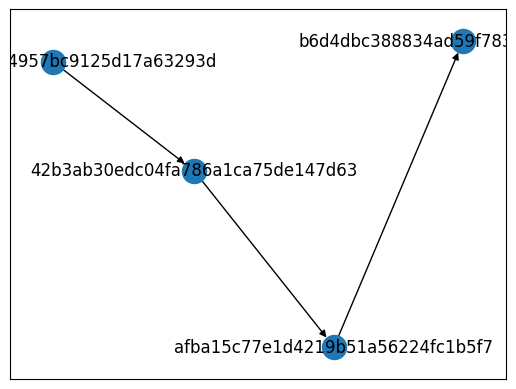

In [23]:
action_graph_service.store.graph.visualize()

In [24]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")

action1.id = <UID: 19f23bb2267f4957bc9125d17a63293d>
action2.id = <UID: 42b3ab30edc04fa786a1ca75de147d63>
action3.id = <UID: afba15c77e1d4219b51a56224fc1b5f7>
action4.id = <UID: b6d4dbc388834ad59f783249116bca8d>


In [25]:
node_action_data_1 = graph_store.get(uid=action1.id, credentials=verify_key).ok()
node_action_data_2 = graph_store.get(uid=action2.id, credentials=verify_key)
node_action_data_3 = graph_store.get(uid=action3.id, credentials=verify_key)
node_action_data_4 = graph_store.get(uid=action4.id, credentials=verify_key)

In [26]:
node_action_data_1

```python
class NodeActionData:
  id: str = 19f23bb2267f4957bc9125d17a63293d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-27 01:53:51
  updated_at: str = 2023-04-27 01:53:51
  user_verify_key: str = 6dd7acf244f7ccaafa1f2aff7aaa06e7126c56df73b1b1fe54a7e3872c67a4b8
  is_mutated: str = True

```

In [27]:
list(graph_store.graph.get_successors(node_action_data_1.id))

,type,id
0,<UID: 42b3ab30edc04fa786a1ca75de147d63>,None
